In [1]:
#Importing libraries
import pandas as pd
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.svm import SVC

In [2]:
#Reading the data
data = pd.read_excel("/content/drive/MyDrive/Chatbot/Rutva/after_clustering_5_17.xlsx")
data = data [['preprocessed_body', 'subject_labels_6', 'Body_labels_8']]
data

,preprocessed_body,subject_labels_6,Body_labels_8
0,we be look for contract option for two hundred...,0,6
1,webinar cannot read or see image view this ema...,4,7
2,dear sir madam greeting from tata teleservices...,3,6
3,dear reader those interested in medtech opport...,3,3
4,good morning my name be alessio comparini and ...,0,0
...,...,...,...
166,hello so we can best serve you at we ask that ...,1,5
167,hi there i hope the first quarter of the year ...,3,6
168,how to achieve cyber security job,0,6
169,hello we be look forward to our finance for no...,3,3


In [3]:
#Applying Filter based conditions
data = data[(data["subject_labels_6"]==0) | (data["subject_labels_6"]==3)] 
data

,preprocessed_body,subject_labels_6,Body_labels_8
0,we be look for contract option for two hundred...,0,6
2,dear sir madam greeting from tata teleservices...,3,6
3,dear reader those interested in medtech opport...,3,3
4,good morning my name be alessio comparini and ...,0,0
6,innovation strategy and design think register ...,3,3
...,...,...,...
165,dear reader this week we share with you some o...,3,3
167,hi there i hope the first quarter of the year ...,3,6
168,how to achieve cyber security job,0,6
169,hello we be look forward to our finance for no...,3,3


In [4]:
data.reset_index(drop=True, inplace=True)
data = data ['preprocessed_body']
data

0     we be look for contract option for two hundred...
1     dear sir madam greeting from tata teleservices...
2     dear reader those interested in medtech opport...
3     good morning my name be alessio comparini and ...
4     innovation strategy and design think register ...
                            ...                        
94    dear reader this week we share with you some o...
95    hi there i hope the first quarter of the year ...
96                    how to achieve cyber security job
97    hello we be look forward to our finance for no...
98    look for support and development for exist int...
Name: preprocessed_body, Length: 99, dtype: object

In [5]:
#Reading the data
df = pd.read_csv("/content/drive/MyDrive/Chatbot/Diya/test_sentences.csv")
df = df['text']
df

0     i saw your company ad in newspaper and i am in...
1     we are looking for python and django developer...
2     hi greeting from isquare business solution i h...
3     in laravel application is the central place wh...
4                                  what is tomato price
                            ...                        
86      how many employees do you have in your company 
87     where are other branches of your company located
88                do we get flexible leaves when needed
89    i had signed up for your local ads services bu...
90                          is it allowed to order food
Name: text, Length: 91, dtype: object

In [6]:
# t = ['i had like to set up a meeting with the corporation to discuss living expenses for people travelling from out of state for a conference.', "how can i get in touch with a member of your HR team",
#      'what is the best way for me to contact a member of your finance department', 'i am diya pancholi i want to request my experience letter for the intern position as i served for six months please grant my intern experience immediately i will be grateful to you',
#     'with due respect it is stated that i have been appointed as an accounts officer in accounts department To acquire my BCom degree from Punjab University I need an InService Certificate to show my experience as per university requirements Therefore kindly issue me the InService Certificate'
#     'kindly prepare a job experience letter and a service certificate for my time here I shall be highly grateful if it gets done sooner',
#      'i understand the goals of the company and I have the experience, the knowledge, and the skills to move it forward', 'I am a self motived person with high expectations as a professional I am sure I will fit perfectly in this company',
#      ' I think I am the right choice for this job because I know how to handle it', 'This job sounds interesting the job description aligns perfectly with my qualifications',
#      'I have experience in this job and I care about the work I do and most importantly I am excited to get started', 'Communication is key for me in stressful situations, even if over-communicating is necessary to ensure everyone is on the same page For example, I was working on a project with another team and we found there was duplicate work being done By scheduling a weekly standup and keeping open lines of honest communication with our teams and managers, we pushed the project forward and ended up contributing to a significant company goal in a big way so i am looking forward to hear from you',
#      'While I highly valued my time at my previous company there are no longer many opportunities for growth that align with my career goals This position aligns perfectly with my skill set and how I am looking to advance my career',
#      'When I began looking for a new position, I purposefully sought out companies that are committed to integrity, philanthropy and innovation and your company ranks at the top of the list Your company has always been forward focused and used technology to help improve the customer experience and I am looking for an opportunity where I can put my passion for great UX to work',
#      'You should hire me for my passion and proven abilities in organization for office efficiency In my previous role as an administrative assistant I came up with a plan to reorganize the office supply closet by category Because items were easier to find we placed fewer orders and saved 30% on office supplies year over year I am excited to bring my skills to this role',
#      'I have been following you on social media for some time and was impressed by the transition you recently made from technology to content strategy I know you’re probably extremely busy, but I would love to sit down with you and hear more about the steps you took to make that transition as well as just learn more about the company you work for',
#      'Are you available anytime next week We could meet for a quick cup of coffee or if you want to grab lunch we could meet at The Taco Station and discuss about the projects',
#      'My name is Amber Jennings and my manager Tom Bryant suggested I request a meeting with you during my upcoming trip to Miami to learn more about the work you are doing with artificial intelligence My background is in information technology and media I have attached my resume so that you can get a better understanding for my background and skills',
#      'I would welcome the opportunity to gain more in depth information about your company and how you’re using AI technology with your clients I am planning a trip to Miami in the next month from the October 15 to 25th and can be available at any time that is convenient for you I hope to have the opportunity to speak with you or even another member of your team during my visit',
#      'We are looking for an enthusiastic and self driven Nodejs Developer to join our team and Creditt is looking for a Node.js Developer responsible for the development of all server-side logic definition and maintenance of the central database and ensuring high performance and responsiveness to requests from the front end',
#      'We are looking for an experienced .Net developer that will be able to design and develop applications from the back end to client side code using optimal and efficient technologies frameworks and patterns Therefore it is essential that you are skilled at problem solving solution design and high quality coding',
#      'We are looking for Webflow developer with basic knowledge in coding html, css and php', 'we are looking for Knowledge of mobile application development Expertise in Java kotlin or both Vital Android SDK concepts Decent experience in SQL and Knowledge of GIT XML also the basics Understanding of material design guidelines Android studio',
#      'We are looking for an Android cum Mobile Application developer responsible for the development and maintenance of applications aimed at a vast number of diverse Android devices. Your primary focus will be the development of Android applications and their integration with back end services You will be working along side other engineers and developers working on different layers of the infrastructure Therefore commitment to collaborative problem solving sophisticated design and creating quality products is essential',
#      'We are looking for an experienced .NET developer Proficiency in ASP.NET MVC Proficiency in .NET 2.0 Hands on experience in MS SQL Server (Stored Procedures), Entity Framework Experience in NopCommerce or Umbraco Should have working knowledge of Javascript, JQuery, HTML5, CSS3 Good verbal communication to attend client calls and keep them in the loop for feedback Excellent requirement gathering/analysis Added advantage if worked on Web Forms and AngularJS before',
#      'To develop Web App and Browser extensions for our flagship product we are looking for a frontend developer who is very proficient in Angular 5+ framework and can take complete ownership of software code development  maintenance and optimisation',
#      'Vacancy for an on site Java Web Developer and Must have experience of a minimum of 3 years', 'Currently we are looking for a remote Senior Java Developer to join our team The customer is a French company in the e-commerce sector specializing in the field of DIY home improvement and gardening Design and develop features with a high quality standard Assimilate business context and company expectations to be creative and relevant Learn and teach through code reviewsImprove the quality and testing of technical component Deploy your code up to production and be involved in monitoring it',
#      'We are looking for a React Native Developer interested in building performant mobile apps on both the iOS and Android platforms You will be responsible for architecting and building these applications as well as coordinating with the teams',
#      'We are looking for an experienced and passionate Angular Developer to join our team Your primary focus will be to implement a complete user interface in the form of a modern web frontend, with a focus on performance As an Angular Developer you will be involved in creating modules and components and coupling them together into a functional app',
#      'we are looking for a Laravel PHP Developer', 'what is air', 'i want to know more about your company', 'can you tell me more about blockchain',
#      'how many employees do you have in your company', 'what are the timings for the employees', 'how many working days', 'hello, i am looking for intenship in AI Ml',
#      'do we get flexible leaves when needed', 'i have heard that you have your branch situated in us is it true', 'what am i supposed to do to apply in your company',
#      'how is the work environment', 'what are the luch timings', 'is everyone friendly in your company', 'how many HRs do you have ', 'is it allowed to eat in the office',
#      'is it allowed to order food', ' I want to make inquiry and see if I can get anything definite', 'where is your canteen', 'do you have your personal fridge',
#      'i have herad you keep all hands every friday', 'what is all hands exactly for', 'do you celebrate every festivals'
#       ]
# dt = pd.DataFrame(t)
# dt

In [7]:
df_sent = pd.concat([data,df])
#df_sent.rename({0:'Sentences'}, inplace = True, axis='columns') #axis = 1)
df_sent.reset_index(drop=True, inplace=True)
df_sent = pd.DataFrame(df_sent)
df_sent.rename({0:'Sentences'}, inplace = True, axis='columns')
df_sent

,Sentences
0,we be look for contract option for two hundred...
1,dear sir madam greeting from tata teleservices...
2,dear reader those interested in medtech opport...
3,good morning my name be alessio comparini and ...
4,innovation strategy and design think register ...
...,...
185,how many employees do you have in your company
186,where are other branches of your company located
187,do we get flexible leaves when needed
188,i had signed up for your local ads services bu...


In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 6.6 MB 45.8 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [10]:
#zero-shot-classification using fb model
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
#df_sent['Sentences'].to_list()

In [11]:
#passing sentences and intents for fb model
sequence_to_classify = df_sent['Sentences'].to_list()
candidate_labels = ['request for support and service', 'provide a service', 'looking for job', "looking for developers", "other"]
ls =  classifier(sequence_to_classify, candidate_labels)

In [12]:
#Getting labels and its scores according to the sentences
label_score = list(map(lambda x: dict(zip(x["labels"], x["scores"])),ls))
dls = pd.DataFrame(label_score)
score_fb = pd.DataFrame(dls.max(axis=1))
score_fb.rename(columns={0:'Max_Score_fb'}, inplace = True)
score_fb

,Max_Score_fb
0,0.314805
1,0.505436
2,0.443279
3,0.329562
4,0.416951
...,...
185,0.549410
186,0.676108
187,0.479884
188,0.657137


In [13]:
#Creating DataFrame for ntent having highest score in fb model
dfmaxfb = pd.DataFrame(dls.idxmax(axis = 1))
dfmaxfb.rename(columns={0:'Max_fb_model'}, inplace = True)
dfmaxfb

,Max_fb_model
0,looking for job
1,provide a service
2,provide a service
3,other
4,other
...,...
185,other
186,other
187,provide a service
188,provide a service


In [14]:
data_sent_fb = pd.concat([df_sent, dfmaxfb], axis=1)

In [15]:
data_sent_fb[(data_sent_fb['Max_fb_model'] == 'general inquiry')]

,Sentences,Max_fb_model


In [16]:
data_sent_fb

,Sentences,Max_fb_model
0,we be look for contract option for two hundred...,looking for job
1,dear sir madam greeting from tata teleservices...,provide a service
2,dear reader those interested in medtech opport...,provide a service
3,good morning my name be alessio comparini and ...,other
4,innovation strategy and design think register ...,other
...,...,...
185,how many employees do you have in your company,other
186,where are other branches of your company located,other
187,do we get flexible leaves when needed,provide a service
188,i had signed up for your local ads services bu...,provide a service


In [17]:
data_sent_fb[(data_sent_fb['Max_fb_model'] == 'looking for job')]

,Sentences,Max_fb_model
0,we be look for contract option for two hundred...,looking for job
6,hello please find my resume for the post of sr...,looking for job
24,i be look for summer internship in the field o...,looking for job
28,hi naresh naukri be great for permanent hire h...,looking for job
48,hi naresh hire below available candidate on co...,looking for job
49,look for qa lead,looking for job
72,look for the job,looking for job
91,dear recruiter greeting for the day i hope thi...,looking for job
96,how to achieve cyber security job,looking for job
111,what are the different ways to learn machine l...,looking for job


In [18]:
data_sent_fb

,Sentences,Max_fb_model
0,we be look for contract option for two hundred...,looking for job
1,dear sir madam greeting from tata teleservices...,provide a service
2,dear reader those interested in medtech opport...,provide a service
3,good morning my name be alessio comparini and ...,other
4,innovation strategy and design think register ...,other
...,...,...
185,how many employees do you have in your company,other
186,where are other branches of your company located,other
187,do we get flexible leaves when needed,provide a service
188,i had signed up for your local ads services bu...,provide a service


In [49]:
#To remove punctuations
def remove_punctuation(text):
    
    """ 
    input: takes original text string 

    output:
    removes punctuations in the text 

    """
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [50]:
#Removes punctuations 
data_sent_fb['Sentences']= data_sent_fb['Sentences'].apply(lambda x:remove_punctuation(x))
data_sent_fb['Sentences']

0      we be look for contract option for two hundred...
1      dear sir madam greeting from tata teleservices...
2      dear reader those interested in medtech opport...
3      good morning my name be alessio comparini and ...
4      innovation strategy and design think register ...
                             ...                        
185      how many employees do you have in your company 
186     where are other branches of your company located
187                do we get flexible leaves when needed
188    i had signed up for your local ads services bu...
189                          is it allowed to order food
Name: Sentences, Length: 190, dtype: object

In [51]:
#Lowering the text
def text_lower(data):
    
    """ 
    input: takes original text string from the data

    output:
    lowers the text in the data

    """
    return data.lower()

In [52]:
#Lowers the text
data_sent_fb['Sentences']= data_sent_fb['Sentences'].apply(lambda x:text_lower(x))
data_sent_fb['Sentences']

0      we be look for contract option for two hundred...
1      dear sir madam greeting from tata teleservices...
2      dear reader those interested in medtech opport...
3      good morning my name be alessio comparini and ...
4      innovation strategy and design think register ...
                             ...                        
185      how many employees do you have in your company 
186     where are other branches of your company located
187                do we get flexible leaves when needed
188    i had signed up for your local ads services bu...
189                          is it allowed to order food
Name: Sentences, Length: 190, dtype: object

In [53]:
# #Getting a set of English stopWords by using nltk library
# nltk.download('stopwords')
# stopwords = nltk.corpus.stopwords.words('english')
# stopwords[0:10]

In [54]:
# """#Removing StopWords 
# data_sent_fb['Sentences'] = data_sent_fb['Sentences'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))
# data_sent_fb['Sentences']"""

In [55]:
data_sent_fb

,Sentences,Max_fb_model,labels
0,we be look for contract option for two hundred...,looking for job,1
1,dear sir madam greeting from tata teleservices...,provide a service,3
2,dear reader those interested in medtech opport...,provide a service,3
3,good morning my name be alessio comparini and ...,other,2
4,innovation strategy and design think register ...,other,2
...,...,...,...
185,how many employees do you have in your company,other,2
186,where are other branches of your company located,other,2
187,do we get flexible leaves when needed,provide a service,3
188,i had signed up for your local ads services bu...,provide a service,3


In [56]:
#Lemmatizing the Data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

word_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
     
    """ 
    input: takes original text string 

    output:
    lemmatized text

    """

    lemm_word=" ".join([word_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [57]:
#Lemmatizing the data
data_sent_fb['Sentences']=data_sent_fb['Sentences'].apply(lambda x: lemmatizer(x))
data_sent_fb['Sentences']

0      we be look for contract option for two hundred...
1      dear sir madam greeting from tata teleservices...
2      dear reader those interested in medtech opport...
3      good morning my name be alessio comparini and ...
4      innovation strategy and design think register ...
                             ...                        
185        how many employee do you have in your company
186       where are other branch of your company located
187                  do we get flexible leaf when needed
188    i had signed up for your local ad service but ...
189                          is it allowed to order food
Name: Sentences, Length: 190, dtype: object

In [ ]:
data_sent_fb

,Sentences,Max_fb_model
0,we be look for contract option for two hundred...,looking for job
1,dear sir madam greeting from tata teleservices...,provide a service
2,dear reader those interested in medtech opport...,provide a service
3,good morning my name be alessio comparini and ...,other
4,innovation strategy and design think register ...,other
...,...,...
185,how many employee do you have in your company,other
186,where are other branch of your company located,other
187,do we get flexible leaf when needed,provide a service
188,i had signed up for your local ad service but ...,provide a service


In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['request for service', 'provide a service', 'looking for job', "looking for developers", "others"])
labels = {}
labels ['labels'] = le.transform(le.classes_)
labels['intents'] = le.inverse_transform([0, 1, 2, 3, 4])
labels

{'intents': array(['looking for developers', 'looking for job', 'others',
        'provide a service', 'request for service'], dtype='<U22'),
 'labels': array([0, 1, 2, 3, 4])}

In [59]:
data_sent_fb['labels']= le.fit_transform(data_sent_fb['Max_fb_model'])
data_sent_fb

,Sentences,Max_fb_model,labels
0,we be look for contract option for two hundred...,looking for job,1
1,dear sir madam greeting from tata teleservices...,provide a service,3
2,dear reader those interested in medtech opport...,provide a service,3
3,good morning my name be alessio comparini and ...,other,2
4,innovation strategy and design think register ...,other,2
...,...,...,...
185,how many employee do you have in your company,other,2
186,where are other branch of your company located,other,2
187,do we get flexible leaf when needed,provide a service,3
188,i had signed up for your local ad service but ...,provide a service,3


In [29]:
data_sent_fb.to_csv("sent_labels.csv")

In [145]:
#Feature Extraction using tfidf without stopwords
docs = data_sent_fb['Sentences']
tfidf_vectorizer = TfidfVectorizer() 
tfidf_vectorizer.fit(docs)
tfidf_vectorizer_vectors = tfidf_vectorizer.transform(docs)
docs = tfidf_vectorizer_vectors.toarray()
docs.shape

(190, 2719)

In [146]:
#Defining x & y
X = docs 
y = data_sent_fb['labels']
print(X.shape, y.shape)

(190, 2719) (190,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.2, 'Value counts: \n3    93\n0    31\n1    25\n2    21\n4    20\nName: labels, dtype: int64')

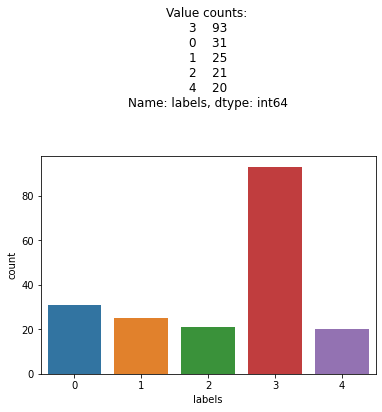

In [62]:
sns.countplot(y)
plt.title('Value counts: \n{}'.format(y.value_counts()), x=0.5, y=1.20, ha='center')

In [147]:
from imblearn.over_sampling import SMOTE
# Balancing the data using SMOTE
sme = SMOTE(random_state=50)
Xs, ys = sme.fit_resample(X, y)
print(X.shape, y.shape)

(190, 2719) (190,)


In [148]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(Xs, ys, test_size=0.3, random_state=50, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(325, 2719) (325,)
(140, 2719) (140,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.2, 'Value counts: \n1    93\n3    93\n2    93\n0    93\n4    93\nName: labels, dtype: int64')

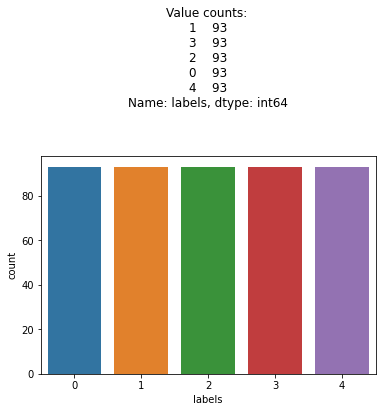

In [65]:
sns.countplot(ys)
plt.title('Value counts: \n{}'.format(ys.value_counts()), x=0.5, y=1.20, ha='center')

In [149]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [67]:
#Fitting Random Forest classifier to the training set  
classifier_rf = RandomForestClassifier(criterion='entropy', max_depth=80 ,max_leaf_nodes=20,random_state=42,max_features=6)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features=6,
                       max_leaf_nodes=20, random_state=42)

In [68]:
#Predicting the test set result 
y_predrf= classifier_rf.predict(X_test)  

In [69]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predrf))
print("Testing Accuracy score:",accuracy_score(y_test, y_predrf))
print(classification_report(y_test,y_predrf))

[[27  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 23  2  0]
 [ 1  0  1 30  0]
 [ 0  0  0  2 23]]
Testing Accuracy score: 0.9571428571428572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00        31
           2       0.96      0.92      0.94        25
           3       0.88      0.94      0.91        32
           4       1.00      0.92      0.96        25

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [70]:
def predict_rf(text):
      
    """
      returns predicted label

    """
    text=[text]

    #tfidf_vectorizer = TfidfVectorizer(stop_words = 'english') 
    #tfidf_vectorizer.fit(text)
    tfidf_vectors = tfidf_vectorizer.transform(text).toarray()
    vec = classifier_rf.predict(tfidf_vectors)
    return le.classes_[vec]

In [ ]:
sent = input("Enter Sentence: ")
predict_rf(sent)

Enter Sentence: i want to apply for a job as a data scientist


array(['looking for job'], dtype=object)

In [160]:
#Fitting XGBoost classifier to the training set  
model_xgb=xgb.XGBClassifier(sampling_method= 'gradient_based', random_state=42,learning_rate=0.05,max_depth=3,base_score=0.1)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.1, learning_rate=0.05, objective='multi:softprob',
              random_state=42, sampling_method='gradient_based')

In [161]:
#Predicting the test set result 
y_predict_xgb= loaded_model.predict(X_test)

In [162]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_xgb))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

[[26  0  0  1  0]
 [ 0 30  0  0  1]
 [ 0  0 25  0  0]
 [ 0  0  0 31  1]
 [ 0  0  0  0 25]]
Testing Accuracy score: 0.9785714285714285
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00        25
           3       0.97      0.97      0.97        32
           4       0.93      1.00      0.96        25

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [159]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_xgb, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [163]:
def predict_xgb_tfidf(text):
      
    """
      returns predicted label

    """
    text=[text]

    #tfidf_vectorizer = TfidfVectorizer(stop_words = 'english') 
    #tfidf_vectorizer.fit(text)
    tfidf_vectors = tfidf_vectorizer.transform(text).toarray()
    vec = loaded_model.predict(tfidf_vectors)
    return le.classes_[vec]

sent = input("Enter Sentence: ")
predict_xgb_tfidf(sent)

Enter Sentence:  we are looking for python developer


array(['looking for developers'], dtype=object)

In [74]:
import fasttext
import fasttext.util

In [31]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.9 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3143502 sha256=8f6f2a4e2fca84e9011901676c23e151a8b16fedf70f77d521c90bacad263de1
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [75]:
data_sent_fb

,Sentences,Max_fb_model,labels
0,we be look for contract option for two hundred...,looking for job,1
1,dear sir madam greeting from tata teleservices...,provide a service,3
2,dear reader those interested in medtech opport...,provide a service,3
3,good morning my name be alessio comparini and ...,other,2
4,innovation strategy and design think register ...,other,2
...,...,...,...
185,how many employee do you have in your company,other,2
186,where are other branch of your company located,other,2
187,do we get flexible leaf when needed,provide a service,3
188,i had signed up for your local ad service but ...,provide a service,3


In [76]:
data_ft = data_sent_fb[['Sentences', 'labels']]
data_ft.to_csv('sent_ft.csv',index=False)
data_ft.drop_duplicates(inplace = True)
data_ft

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Sentences,labels
0,we be look for contract option for two hundred...,1
1,dear sir madam greeting from tata teleservices...,3
2,dear reader those interested in medtech opport...,3
3,good morning my name be alessio comparini and ...,2
4,innovation strategy and design think register ...,2
...,...,...
185,how many employee do you have in your company,2
186,where are other branch of your company located,2
187,do we get flexible leaf when needed,3
188,i had signed up for your local ad service but ...,3


In [77]:
model=fasttext.train_supervised('sent_ft.csv')

In [ ]:
len(data_ft['Sentences'].values.tolist())

153

In [78]:
data_ft['vectors']=data_ft['Sentences'].apply(lambda x: model.get_sentence_vector(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
data_ft

,Sentences,labels,vectors
0,we be look for contract option for two hundred...,1,"[0.0017141309, 0.00036447684, -0.00054070604, ..."
1,dear sir madam greeting from tata teleservices...,3,"[0.00027887675, 0.0009969785, 0.0005818131, -0..."
2,dear reader those interested in medtech opport...,3,"[-5.0196595e-05, 0.0012782209, 7.2060044e-05, ..."
3,good morning my name be alessio comparini and ...,2,"[0.0010014217, 0.00016072045, 0.000114214155, ..."
4,innovation strategy and design think register ...,2,"[0.00040289777, 0.00054988347, -0.0005327802, ..."
...,...,...,...
185,how many employee do you have in your company,2,"[-0.0010578204, -0.0015963704, 0.00020103563, ..."
186,where are other branch of your company located,2,"[0.0028137348, -0.0020687855, 0.0015737629, 0...."
187,do we get flexible leaf when needed,3,"[-0.0007172651, -0.0010325996, -0.0018407938, ..."
188,i had signed up for your local ad service but ...,3,"[0.0012350689, -0.0008743712, 0.0015047755, -0..."


In [ ]:
vec_df = data_ft['vectors'].to_list()
vec_df

In [91]:
from transformers.utils.dummy_vision_objects import YolosFeatureExtractor
#Defining x & y
x = vec_df 
YolosFeatureExtractor = data_ft['labels']
print(len(X), y.shape)

153 (153,)


In [92]:
from imblearn.over_sampling import SMOTE
# Balancing the data using SMOTE
sme = SMOTE(random_state=50)
xs, Ys = sme.fit_resample(x, Y)
print(len(xs), Ys.shape)

380 (380,)


In [93]:
# Xs = pd.DataFrame(Xs)
# Xs = Xs.to_array()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.2, 'Value counts: \n1    76\n3    76\n2    76\n0    76\n4    76\nName: labels, dtype: int64')

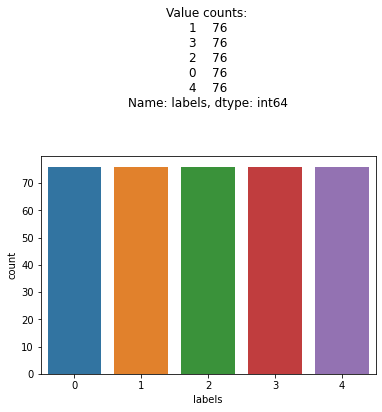

In [84]:
sns.countplot(ys)
plt.title('Value counts: \n{}'.format(Ys.value_counts()), x=0.5, y=1.20, ha='center')

In [120]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(xs, Ys, test_size=0.2, random_state=0, shuffle=True)
print(len(X_train), y_train.shape)
print(len(X_test), y_test.shape)

304 (304,)
76 (76,)


In [134]:
import numpy as np
#Fitting XGBoost classifier to the training set  
modelxgb=xgb.XGBClassifier(random_state=50)
modelxgb.fit(np.array(X_train), np.array(y_train))

XGBClassifier(objective='multi:softprob', random_state=50)

In [135]:
#Predicting the test set result 
y_pred_xgb= modelxgb.predict(X_test)

In [136]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_pred_xgb))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[12  0  0  0  0]
 [ 5 11  0  0  0]
 [ 0  0 16  0  4]
 [ 0  1  2 13  1]
 [ 0  0  0  0 11]]
Testing Accuracy score: 0.8289473684210527
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.92      0.69      0.79        16
           2       0.89      0.80      0.84        20
           3       1.00      0.76      0.87        17
           4       0.69      1.00      0.81        11

    accuracy                           0.83        76
   macro avg       0.84      0.85      0.83        76
weighted avg       0.86      0.83      0.83        76



In [156]:
def predict_xgb_ft(text):
      
    """
      returns predicted label

    """
    #text=[text]

    #tfidf_vectorizer = TfidfVectorizer(stop_words = 'english') 
    #tfidf_vectorizer.fit(text)
    vecs = model.get_sentence_vector(text)
    vec = modelxgb.predict([vecs])
    return le.classes_[vec]

sent = input("Enter Sentence: ")
predict_xgb_ft(sent)

Enter Sentence: we are looking for full stack developer


array(['provide a service'], dtype=object)